<a href="https://colab.research.google.com/github/Nishidh25/IEEE-Coders-Week---ML/blob/master/Day%205/Twitter_Toxic_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping Twitter tweets for classification

In [0]:
from tweepy import OAuthHandler 
from textblob import TextBlob 
import re
import tweepy 
import csv

## Getting data from Twitter's Api and doing sentiment analysis on it


In [0]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = "kNOwqjB6YjrJsMYAicZhsk4bE"
        consumer_secret = "l6mTxAkAfyQ2JIkYpvIWdRrwTCCWUgJb69MQp7u6gYUYEauTwB"
        access_token = "2277900324-hoUKCi6WFjPuAOyxAXfU6TxW5m8REhSJoLXubTr"
        access_token_secret = "UkUBLNl36yUbiNy3frVcmBXriGqXBE5Cj8jXLJVAqvygD"
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
        
        return ' '.join(word for word in tweet.split() if word[0]!='@' and word!='RT')
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'not-toxic'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'toxic'
  
    def get_tweets(self, query, count = 10000): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = self.clean_tweet(tweet.text)
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [0]:
# creating object of TwitterClient Class 
api = TwitterClient() 

def create_set(words,string):

  for query in words:

    tweets = api.get_tweets(query = query, count = 10000) 
      
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'not-toxic'] 

    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'toxic'] 
    


    if string == "negative":
      # Writing Positive tweets from negative sentiments to csv - For future reference 
      for tweet in ptweets: 
          filename = 'positive_from_negative.csv'
          with open (filename, 'a+', newline='') as csvFile:
            csvWriter = csv.writer(csvFile)  
            #writing a csv file
            csvWriter.writerow([tweet['text'],tweet['sentiment']]) 
          
        
      # Writing negative tweets to csv 
      for tweet in ntweets:
          filename = 'negative.csv'
          with open (filename, 'a+', newline='') as csvFile:
            csvWriter = csv.writer(csvFile)  
            #writing a csv file
            csvWriter.writerow([tweet['text'],tweet['sentiment']]) 
          


    elif string == "positive":
      # Writing Positive tweets to csv  
      for tweet in ptweets: 
          filename = 'positive.csv'
          with open (filename, 'a+', newline='') as csvFile:
            csvWriter = csv.writer(csvFile)  
            #writing a csv file
            csvWriter.writerow([tweet['text'],tweet['sentiment']]) 
          
        
      # Writing Negative tweets from positive sentiments to csv - For future reference
      for tweet in ntweets:
          filename = 'negative_from_positive.csv'
          with open (filename, 'a+', newline='') as csvFile:
            csvWriter = csv.writer(csvFile)  
            #writing a csv file
            csvWriter.writerow([tweet['text'],tweet['sentiment']])  

### Getting Relevant tweets for toxic and not-toxic datasets

We take some possible key words for both cases and get tweets related to them.

Logic :
* Tweets with negative sentiment on toxic_words will give us data for toxic tweets

* Tweets with positive sentiment on non-toxic_words will give us data for non-toxic tweets

In [0]:
toxic_words=["faggot","nigger","moron","wanker","suck","pig","fuck","shit","bullshit","gay","die","bitch"]
random_words = ["talk","aricle","well","thanks","fact","see","thank you","good"]

create_set(toxic_words,"negative")
create_set(random_words,"positive")

# Data Preparation

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading data

In [0]:
positive_data = pd.read_csv("positive.csv")
negative_data = pd.read_csv("negative.csv")

In [3]:
positive_data.head()

,Why is the guy that lit the fire still able to walk talk and breath That was attempted murder,not-toxic
0,People still think it s weird to talk to yours...,not-toxic
1,i really want to talk to someone about my feel...,not-toxic
2,I love listening to the old heads talk,not-toxic
3,Ah Thank you I finally feel normal It irks me ...,not-toxic
4,Kind of thinking about coloring my hair like s...,not-toxic


In [4]:
negative_data.head()

,comment down below like and subscribe to join faggot kins,toxic
0,If he does come up to me starting shit again I...,toxic
1,You had a fucking chance to be absolutely anyb...,toxic
2,These faggot ass cops ain t got shit else to d...,toxic
3,All I m hearing is you can play online now wit...,toxic
4,The worst thing about some Texas locals gettin...,toxic


In [5]:
# Adding proper indexes to the data

index_data = positive_data.columns
positive_data.columns = ['text','toxic']
positive_data.append({'text' : index_data[0] , 'toxic' : index_data[1] } , ignore_index=True)

index_data = negative_data.columns
negative_data.columns = ['text','toxic']
negative_data.append({'text' : index_data[0] , 'toxic' : index_data[1] } , ignore_index=True)

,text,toxic
0,If he does come up to me starting shit again I...,toxic
1,You had a fucking chance to be absolutely anyb...,toxic
2,These faggot ass cops ain t got shit else to d...,toxic
3,All I m hearing is you can play online now wit...,toxic
4,The worst thing about some Texas locals gettin...,toxic
...,...,...
249,I really dgaf about that video y all throw in ...,toxic
250,Bitch I get so wasted when I do this show,toxic
251,trying really hard not to subtweet my ex frien...,toxic
252,adamaris h You know who s crazy Me bitch so st...,toxic


## Merging toxic and not-toxic data into one dataframe

In [6]:
data = pd.concat([negative_data, positive_data])
data.head()

,text,toxic
0,If he does come up to me starting shit again I...,toxic
1,You had a fucking chance to be absolutely anyb...,toxic
2,These faggot ass cops ain t got shit else to d...,toxic
3,All I m hearing is you can play online now wit...,toxic
4,The worst thing about some Texas locals gettin...,toxic


## Visualisation 

Number of toxic , not-toxic messages

Text(0.5, 1.0, 'Number of toxic , not-toxic messages')

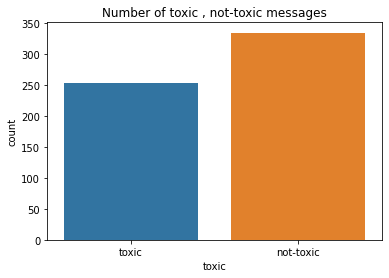

In [7]:
sns.countplot(data.toxic)
plt.xlabel('toxic')
plt.title('Number of toxic , not-toxic messages')

# Using spaCy for NLP

In [8]:
import spacy

# Create an empty model
nlp = spacy.blank("en")

# Create the TextCategorizer with exclusive classes and "bow" architecture
textcat = nlp.create_pipe(
              "textcat",
              config={
                "exclusive_classes": True,
                "architecture": "bow"})

# Add the TextCategorizer to the empty model
nlp.add_pipe(textcat)
textcat.add_label("toxic")
textcat.add_label("not-toxic")

1

In [9]:
train_texts = data['text'].values
train_labels = [{'cats': {'toxic': label == 'toxic',
                          'not-toxic': label == 'not-toxic'}
                 } 
                for label in data['toxic']
                ]

train_data = list(zip(train_texts, train_labels))
train_data[:3]

[('If he does come up to me starting shit again I m going past the point of making him bleed from his face and killing',
  {'cats': {'not-toxic': False, 'toxic': True}}),
 ('You had a fucking chance to be absolutely anybody on Twitter but you chose to be a fucking faggot',
  {'cats': {'not-toxic': False, 'toxic': True}}),
 ('These faggot ass cops ain t got shit else to do with their time but fuck wit us',
  {'cats': {'not-toxic': False, 'toxic': True}})]

In [0]:
from spacy.util import minibatch

optimizer = nlp.begin_training()

# Create the batch generator with batch size = 8
batches = minibatch(train_data, size=8)
# Iterate through minibatches
for batch in batches:
    # Each batch is a list of (text, label) but we need to
    # send separate lists for texts and labels to update().
    # This is a quick way to split a list of tuples into lists
    texts, labels = zip(*batch)
    nlp.update(texts, labels, sgd=optimizer)

In [11]:
optimizer = nlp.begin_training()
import random

losses = {}
for epoch in range(10):
    random.shuffle(train_data)
    # Create the batch generator with batch size = 8
    batches = minibatch(train_data, size=8)
    # Iterate through minibatches
    for batch in batches:
        # Each batch is a list of (text, label) but we need to
        # send separate lists for texts and labels to update().
        # This is a quick way to split a list of tuples into lists
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd=optimizer, losses=losses)
    print(losses)

{'textcat': 0.42557259323075414}
{'textcat': 0.705292085185647}
{'textcat': 0.8932000212371349}
{'textcat': 1.0223114843247458}
{'textcat': 1.1192265564750414}
{'textcat': 1.1928108507418074}
{'textcat': 1.2476629788143327}
{'textcat': 1.2914749584742822}
{'textcat': 1.3299586838693358}
{'textcat': 1.3586536658622208}


In [12]:
texts = ["Pleasure to meet you sir",
         "fucking faggot" ]
docs = [nlp.tokenizer(text) for text in texts]
    
# Use textcat to get the scores for each doc
textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

print(scores)

[[0.35812306 0.64187694]
 [0.73926336 0.2607367 ]]


In [13]:
predicted_labels = scores.argmax(axis=1)
print([textcat.labels[label] for label in predicted_labels])

['not-toxic', 'toxic']


# Keras Model with LSTM for text classification

## Imports

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [0]:
X = data.text
Y = data.toxic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

## Defining model

In [0]:
model = tf.keras.Sequential([
                             
        tf.keras.layers.Input(name='inputs',shape=[max_len]),
        tf.keras.layers.Embedding(max_words, 50, input_length = max_len),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1,activation='relu')

        ])

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 96,337
Trainable params: 96,337
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer= "RMSprop" ,metrics=['accuracy'])

## Training model with our dataset

In [93]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=15,
          validation_split=0.15 )
          #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/15
4/4 [==============================] - 1s 229ms/step - loss: 2.5364 - accuracy: 0.5708 - val_loss: 0.8981 - val_accuracy: 0.6000
Epoch 2/15
4/4 [==============================] - 1s 132ms/step - loss: 0.8006 - accuracy: 0.5778 - val_loss: 0.7153 - val_accuracy: 0.4933
Epoch 3/15
4/4 [==============================] - 1s 133ms/step - loss: 0.6745 - accuracy: 0.5920 - val_loss: 0.6966 - val_accuracy: 0.6000
Epoch 4/15
4/4 [==============================] - 1s 131ms/step - loss: 0.6264 - accuracy: 0.6274 - val_loss: 0.6438 - val_accuracy: 0.6667
Epoch 5/15
4/4 [==============================] - 1s 132ms/step - loss: 0.5672 - accuracy: 0.7476 - val_loss: 0.6485 - val_accuracy: 0.6133
Epoch 6/15
4/4 [==============================] - 1s 131ms/step - loss: 0.5438 - accuracy: 0.7193 - val_loss: 0.5955 - val_accuracy: 0.6667
Epoch 7/15
4/4 [==============================] - 1s 131ms/step - loss: 0.4072 - accuracy: 0.8986 - val_loss: 4.0068 - val_accuracy: 0.4133
Epoch 8/15
4/4 [====

In [0]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

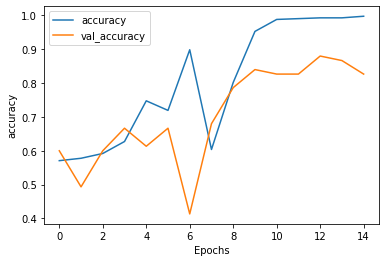

In [95]:
plot_graphs(history, 'accuracy')

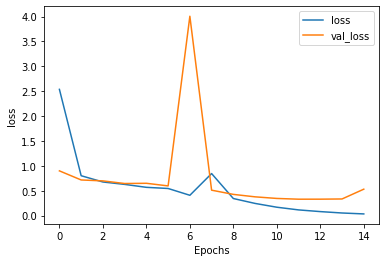

In [96]:
plot_graphs(history, 'loss')

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

## Accuracy on Test Set

In [98]:
accr = model.evaluate(test_sequences_matrix,Y_test)

3/3 [==============================] - 0s 13ms/step - loss: 0.3639 - accuracy: 0.8539


### We achieve 85% acccuracy on test set , without overfitting on the training set